In [1]:


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()

Saving NLP dataset 1 (1).csv to NLP dataset 1 (1).csv


In [4]:
input=list(uploaded.keys())
print(input)
input=input[0]
print(input)

['NLP dataset 1 (1).csv']
NLP dataset 1 (1).csv


In [5]:
extension= input.split(".")
print(extension[1])

csv


In [6]:
dataset = pd.read_csv(input)
dataset.head()

,text,class
0,Now all @Apple has to do is get swype on the i...,1
1,@Apple will be adding more carrier support to ...,1
2,Hilarious @youtube video - guy does a duet wit...,1
3,@RIM you made it too easy for me to switch to ...,1
4,I just realized that the reason I got into twi...,1


In [7]:
print(dataset)

                                                  text  class
0    Now all @Apple has to do is get swype on the i...      1
1    @Apple will be adding more carrier support to ...      1
2    Hilarious @youtube video - guy does a duet wit...      1
3    @RIM you made it too easy for me to switch to ...      1
4    I just realized that the reason I got into twi...      1
..                                                 ...    ...
474  Houston we have a problem!! My iPad has been r...      0
475  #Siri went down for a little while last night....      0
476  @ford should have teamed up with @Apple instea...      0
477  RT @gdcurry: Really @Apple?  What have you don...      0
478                                DAMN YOU !!! @apple      0

[479 rows x 2 columns]


In [8]:
dataset.shape

(479, 2)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    479 non-null    object
 1   class   479 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


In [10]:
#Data types of Columns
types = dataset.dtypes
print(types)

text     object
class     int64
dtype: object


In [11]:
#Count total number of classes in Data
class_counts = dataset.groupby('class').size()
print(class_counts)

class
0    316
1    163
dtype: int64


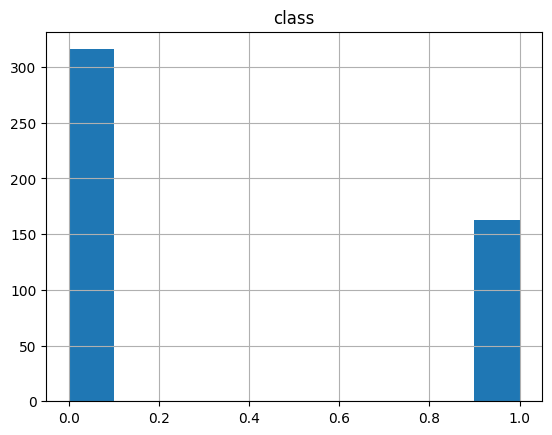

In [12]:
# Histogram plot
from matplotlib import pyplot
dataset.hist()
pyplot.show()

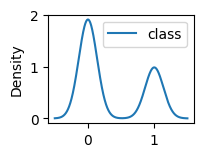

In [13]:
#Density Plot
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [14]:
#Finding missing values
dataset.isnull().sum()

text     0
class    0
dtype: int64

In [15]:
# Removing index column
dataset = dataset.dropna()

In [16]:
dataset

,text,class
0,Now all @Apple has to do is get swype on the i...,1
1,@Apple will be adding more carrier support to ...,1
2,Hilarious @youtube video - guy does a duet wit...,1
3,@RIM you made it too easy for me to switch to ...,1
4,I just realized that the reason I got into twi...,1
...,...,...
474,Houston we have a problem!! My iPad has been r...,0
475,#Siri went down for a little while last night....,0
476,@ford should have teamed up with @Apple instea...,0
477,RT @gdcurry: Really @Apple? What have you don...,0


In [17]:
print(dataset.loc[0][0])

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is


In [18]:
# Let us take text to understand process of data preprocessing in NLP
line="Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is"

In [19]:
# First step: cleaning Text and removing number and punctuation marks.
import re
review = re.sub('[^a-zA-Z]', ' ', dataset['text'][0])
print(line)
print('-------------------------------------------------')
print('Review after removing number and punctuation marks. ')
print(review)

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
-------------------------------------------------
Review after removing number and punctuation marks. 
Now all  Apple has to do is get swype on the iphone and it will be crack  Iphone that is


In [20]:
# Second  step: converting text into lower case.
review=review.lower()
print(line)
print('-------------------------------------------------')
print('Text after convering into lower case')
print(review)

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
-------------------------------------------------
Text after convering into lower case
now all  apple has to do is get swype on the iphone and it will be crack  iphone that is


In [21]:
# Third step: Removing stop words like 'this, the'
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
review = review.split()
print(review)

['now', 'all', 'apple', 'has', 'to', 'do', 'is', 'get', 'swype', 'on', 'the', 'iphone', 'and', 'it', 'will', 'be', 'crack', 'iphone', 'that', 'is']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
# Third step: Removing stop words like 'this, the'
# set function is generally used for long article to fasten process
review1 = [word for word in review if not word in set(stopwords.words('english'))]
print('Text after removing stop words')
print(review1)

Text after removing stop words
['apple', 'get', 'swype', 'iphone', 'crack', 'iphone']


In [23]:
# Fourth step: converting stemming words
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review1 if not word in set(stopwords.words('english'))]
print('After converting stemmer words')
print(review)

After converting stemmer words
['appl', 'get', 'swype', 'iphon', 'crack', 'iphon']


In [24]:
# joining these words of list
review2 = ' '.join(review)

In [25]:
# Creating the Bag of Words model
corpus1 = []
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(review2)
corpus1.append(review2)
print(corpus1)
X = cv.fit_transform(corpus1).toarray()
print(X)

appl get swype iphon crack iphon
['appl get swype iphon crack iphon']
[[1 1 1 2 1]]


In [26]:
# Cleaning the texts for all review using for loop
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset.iloc[:,0][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    print(review)
    corpus.append(review)

appl get swype iphon crack iphon
appl ad carrier support iphon announc
hilari youtub video guy duet appl siri pretti much sum love affair http co exbnqji
rim made easi switch appl iphon see ya
realiz reason got twitter io thank appl
current blackberri user littl bit disappoint move android appl iphon
strangest thing siri said far sooo glad appl gave siri sens humor http co twaeudbp via happyplac
great close person event appl tonight regent st store
compani experi best custom servic asid zappo appl
appli job appl hope call lol
rt jamaicanidl lmao think appl onto someth magic die haha siri suggest find whore h
lmao think appl onto someth magic die haha siri suggest find whore hide bodi lolol
rt philliprowntre regist appl develop hope actual help greatli appreci
wow great deal refurb ipad first gen model rt appl offer great deal refurbish st gen ipad http co ukwokbgd appl
regist appl develop hope actual help greatli appreci
current learn mandarin upcom trip hong kong gotta hand appl iphon

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


wisconsin mommi appl total email compani alway get great servic appl store
appl love new io upgrad iphon
nice appl tech support guy fix itouch
get great custom servic appl store millenia mall
io faster ipad appl
love appl imac even though seen hubbi day geek
make switch android appl iphon iphon smartphon stevejob appl store http co kj pjvkh
thank incred peopl appl go beyond offer replac water damag macbook pro wow
play man love camera iphon well done appl fb http co tmdfqre
yeah appl io readinglist chang life nowicanspendevenmoretimeonmyphon
appl safari reader own worldwid web
love appl servic case crack x go hand case walk
twitterpeopleiwouldliketomeet coollik thegadgetshow thelittleappkid jon laker benruberi appl twitter fxhomehitfilm
said laid next year appl job last iphon iphon iphon g magic http co dxxklubp
kind excit way last class right go appl store buy macosc snow leopard lion
use blackberri yr disrupt lost gig thx servic im move appl iphon
appl sell million iphon day appl kee

In [27]:
print(corpus)

['appl get swype iphon crack iphon', 'appl ad carrier support iphon announc', 'hilari youtub video guy duet appl siri pretti much sum love affair http co exbnqji', 'rim made easi switch appl iphon see ya', 'realiz reason got twitter io thank appl', 'current blackberri user littl bit disappoint move android appl iphon', 'strangest thing siri said far sooo glad appl gave siri sens humor http co twaeudbp via happyplac', 'great close person event appl tonight regent st store', 'compani experi best custom servic asid zappo appl', 'appli job appl hope call lol', 'rt jamaicanidl lmao think appl onto someth magic die haha siri suggest find whore h', 'lmao think appl onto someth magic die haha siri suggest find whore hide bodi lolol', 'rt philliprowntre regist appl develop hope actual help greatli appreci', 'wow great deal refurb ipad first gen model rt appl offer great deal refurbish st gen ipad http co ukwokbgd appl', 'regist appl develop hope actual help greatli appreci', 'current learn mand

In [28]:
#    Adding corpus to csv 
corpus_dataset = pd.DataFrame(corpus)
corpus_dataset['corpus'] = corpus_dataset
corpus_dataset = corpus_dataset.drop([0], axis = 1) 
corpus_dataset.to_csv('/content/drive/My Drive/corpus_2.csv')

In [29]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(cv)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

CountVectorizer(max_features=1500)


In [30]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
X.shape


(479, 1500)

In [32]:
print(y)
y.shape

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


(479,)

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [34]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[60  7]
 [ 7 22]]


In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 75.862


In [38]:
from sklearn.metrics import f1_score
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 75.862


In [39]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 75.862


In [40]:
# save the model to disk
import joblib
filename = '/content/drive/My Drive/naivebayes_model2_NLP.sav'
joblib.dump(classifier, filename)
 
# some time later...
 
# load the model from disk
naive_bayes_model = joblib.load(filename)
result = naive_bayes_model.score(X_test, y_test)
print(result)

0.8541666666666666


In [66]:
Review = "hate food" #@param {type:"string"}
input_data = [Review] 
  
input_data = cv.transform(input_data).toarray()
print(input_data)

input_pred = classifier.predict(input_data)

input_pred = input_pred.astype(int)


if input_pred[0]==1:
    print("Review is Positive")
else:
    print("Review is Negative")

[[0 0 0 ... 0 0 0]]
Review is Negative


In [42]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/sentiment_analyse_NLP.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [43]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/sentiment_analyse_NLP.pkl','rb'))  
# Use the loaded pickled model to make predictions

In [44]:
!pip install streamlit==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=7e1369d356b242296ca1f3fe581769418aa714c050ec95ed37351a6c4c590db7
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Unins

In [45]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19790 sha256=cfe97086d00ca2adea61d45ba3ab0f4ccfe4a5df4c5fc5ec322524894d3b098b
  Stored in directory: /root/.cache/pip/wheels/f6/89/59/49d4249e00957e94813ac136a335d10ed2e09a856c5096f95c
Successfully built pyngrok


In [47]:
!ngrok authtoken 2CT4K2ld8wdjqwUpuZFCzE27aDo_3PuRVE36RorTvL9a7CR1V

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [48]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
model = pickle.load(open('/content/drive/My Drive/sentiment_analyse_NLP.pkl','rb'))   


def review(text1):
  dataset = pd.read_csv('/content/drive/My Drive/Dataset/NLP dataset 1.csv')
  # First step: cleaning Text and removing number and punctuation marks.
  # Cleaning the texts for all review using for loop
  import re
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  from nltk.stem.porter import PorterStemmer
  corpus = []
  for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    #print(review)
    corpus.append(review)
  # Creating the Bag of Words model
  from sklearn.feature_extraction.text import CountVectorizer
  cv = CountVectorizer(max_features = 1500)
  #print(cv)
  X = cv.fit_transform(corpus).toarray()
  import re
  review = re.sub('[^a-zA-Z]', ' ', text1)
  review=review.lower()
  print(review)
  # Third step: Removing stop words like 'this, the'
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  review = review.split()
  print(review)
  # Third step: Removing stop words like 'this, the'
   # set function is generally used for long article to fastem process
  review1 = [word for word in review if not word in set(stopwords.words('english'))]
  print(review1)
  # Fourth step: converting stemming words
  from nltk.stem.porter import PorterStemmer
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review1 if not word in set(stopwords.words('english'))]
  print(review)
  # joining these words of list
  review2 = ' '.join(review)
  print(review2)
  # Creating the Bag of Words model
  
  X = cv.transform(review).toarray()
  input_pred = model.predict(X)
  input_pred = input_pred.astype(int)
  print(input_pred)
  if input_pred[0]==1:
    result= "Review is Positive"
  else:
    result="Review is negative" 

 
    
  return result
html_temp = """
   <div class="" style="background-color:purple;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:orange;margin-top:10px;">AceHack 2.0</p></center> 
   <center><p style="font-size:30px;color:orange;margin-top:10px;">Department of Computer Engineering</p></center> 
  
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
st.header("Sentiment Analysis System ")
  
  
text1= st.text_area("Write the statement")

if st.button("Sentiment Analysis"):
  result=review(text1)
  st.success('Model has predicted {}'.format(result))
      
if st.button("About"):
  st.subheader("Developed by jayendra sharma and kanchan ")
  st.subheader("Student , Department of Computer Engineering")
html_temp = """
   <div class="" style="background-color:red;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:green;margin-top:10px;"></p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Writing app.py


In [52]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [53]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://0cce-35-231-235-253.ngrok.io" -> "http://localhost:80">

In [55]:
!streamlit run --server.port 80 app.py

2023-04-02 03:29:14.382 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:80
  External URL: http://35.231.235.253:80

  Stopping...
  Stopping...
^C
